In this place you can find my Python data analysis (codes, tables, and figures) performed on data of Adventure Works Cycles(a large wholesaler of bicycles in the US and Europe). The main goal of this analysis is to show my potential employer the skills of data analysis that I possess.

In [1]:
# Importing all necessary libraries and dataset 
import pandas as pd
import numpy as np
from plotnine import *
url = "https://raw.githubusercontent.com/uroszivanovic/doodle-data-analyst/main/adventure_works_purchase_orders.csv"
awpo = pd.read_csv(url)
# Converting 'OrderDate' column to datetime format
awpo['OrderDate'] = pd.to_datetime(awpo['OrderDate'])
pd.unique(pd.Series(awpo['OrderDate']))

array(['2005-07-01T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
       '2005-09-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01

For all datetime values, except one, the day of the month eaquals 0. Bassicaly, this is the only record where Sales and Customer Region is Germany, all the others are France or USA.

In [2]:
awpo[awpo['OrderDate']==pd.to_datetime("2008-03-31")]

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,2008-03-31,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,...,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.1571,337.22,0.0,1,6.2386


In [3]:
awpo[awpo['Sales_Region']=="Germany"]

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,2008-03-31,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,...,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.1571,337.22,0.0,1,6.2386


In [4]:
awpo[awpo['Sales_Region']=="Germany"]

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,2008-03-31,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,...,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.1571,337.22,0.0,1,6.2386


This one record bassicaly will not impact our analysis so we can get rid of it. 

In [5]:
# We are also adding new variables that will be helpful later trough the analysis.
# * IsDiscount: boolean
# * UnitProfit: float64
# * QuantityProfit: float64
# * QuantityProfitNoFreight: float64
awpo = awpo.assign(UnitPriceDiscountAbsolute = awpo.UnitPrice * awpo.UnitPriceDiscount,
            IsDiscount = awpo.UnitPriceDiscount != 0,
            UnitProfit = awpo.UnitPrice*(1-awpo.UnitPriceDiscount)-(awpo.Unit_Cost + awpo.Unit_Freight_Cost),
            QuantityProfit = (awpo.UnitPrice*(1-awpo.UnitPriceDiscount)-(awpo.Unit_Cost+awpo.Unit_Freight_Cost))*awpo.OrderQty,
            QuantityProfitNoFreight = (awpo.UnitPrice*(1-awpo.UnitPriceDiscount)-awpo.Unit_Cost)*awpo.OrderQty)\
    .query('Sales_Region != "Germany"')

Now we are able to see our first plot showing total profit per month.

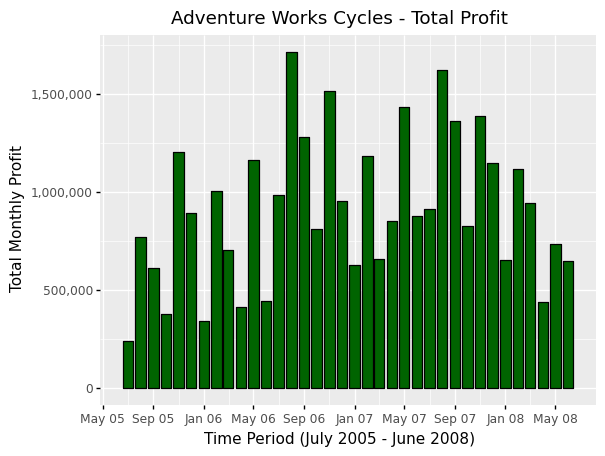

<ggplot: (8794534562925)>

In [6]:
# For the purpose of creating a visualization let's first define two functions that will help us set labels and breaks 
# on the plots, and then import all necessary visualization tools.
ProfitOrderDate = awpo.groupby('OrderDate')\
    .agg(TotalProfit = ('QuantityProfit', 'sum'))\
    .reset_index()


def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()

def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()

from plotnine import ggplot, aes, geom_line, geom_bar, labs, geom_vline, scale_y_continuous, theme, scale_x_date, stat_summary, facet_wrap


(
ggplot(ProfitOrderDate) +
  geom_bar(aes(x = "OrderDate", y = "TotalProfit"),
                 fill = "darkgreen", color = 'black', stat = "identity") +
  labs(
        title ='Adventure Works Cycles - Total Profit',
        x = 'Time Period (July 2005 - June 2008)',
        y = 'Total Monthly Profit',
    ) +
  scale_y_continuous(
        labels = labels(0, 2000000, 500000),
        breaks = breaks(0, 2000000, 500000)
    ) +
  scale_x_date(date_labels = "%b %y")
)

Profit with no freight cost by Product Category is represented in this table. 

In [7]:
ProfitNoFreight = awpo.groupby('Product_Category')\
    .agg(TotalProfitNoFreight = ('QuantityProfitNoFreight', 'sum'))\
    .reset_index()

ProfitNoFreight['percent_rank'] = (ProfitNoFreight.TotalProfitNoFreight / 
                            ProfitNoFreight.TotalProfitNoFreight.sum()) * 100

ProfitNoFreight.sort_values(by=['percent_rank'], ascending = False).reset_index(drop=True)


,Product_Category,TotalProfitNoFreight,percent_rank
0,Bikes,3.203100e+07,81.342642
1,Components,6.091057e+06,15.468225
2,Clothing,9.005934e+05,2.287055
3,Accessories,3.552195e+05,0.902079


Let's see what is the total profit gained by selling Bikes and Components.

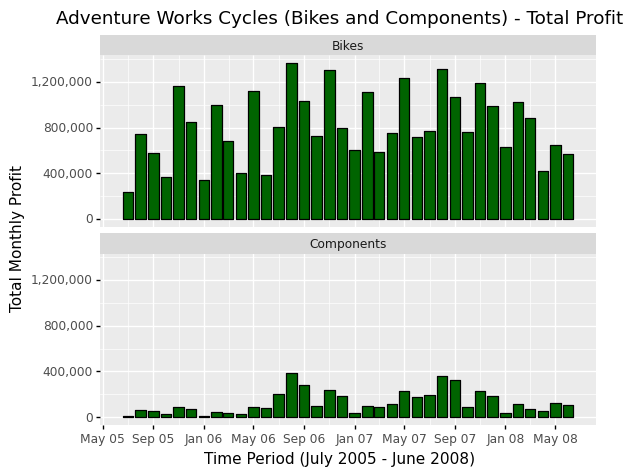

<ggplot: (8794534564572)>

In [9]:
pc_filter = ['Bikes', 'Components']
BikesComponents = awpo[awpo.Product_Category.isin(pc_filter)]\
    .groupby(['OrderDate','Product_Category'])\
    .agg(TotalProfit = ('QuantityProfit', 'sum'))\
    .reset_index()

(
ggplot(BikesComponents) +
  geom_bar(aes(x = "OrderDate", y = "TotalProfit"),
                 fill = "darkgreen", color = 'black', stat = "identity") +
  labs(
        title = 'Adventure Works Cycles (Bikes and Components) - Total Profit',
        x = 'Time Period (July 2005 - June 2008)',
        y = 'Total Monthly Profit',
    ) +
  scale_y_continuous(
        labels = labels(0, 1650000, 400000),
        breaks = breaks(0, 1650000, 400000)
    ) +
  scale_x_date(date_labels = "%b %y") +
  facet_wrap('~ Product_Category', nrow = 2)
)

We see less profit made in last few months by selling products of these categories. Let's see what is going on among regions.

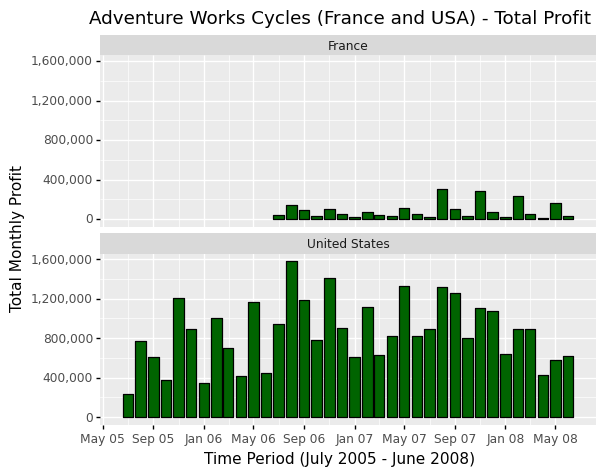

<ggplot: (8794534439268)>

In [11]:
FranceUSA = awpo.groupby(['OrderDate','Sales_Region'])\
    .agg(TotalProfit = ('QuantityProfit', 'sum'))\
    .reset_index()

(
ggplot(FranceUSA) +
  geom_bar(aes(x = "OrderDate", y = "TotalProfit"),
                 fill = "darkgreen", color = 'black', stat = "identity") +
  labs(
        title ='Adventure Works Cycles (France and USA) - Total Profit',
        x = 'Time Period (July 2005 - June 2008)',
        y = 'Total Monthly Profit',
    ) +
  scale_y_continuous(
        labels = labels(0, 1600000, 400000),
        breaks = breaks(0, 1600000, 400000)
    ) +
  scale_x_date(date_labels = "%b %y") +
  facet_wrap('~ Sales_Region', nrow = 2)
)

Most of the profit was made in USA but still we do not see any pattern representing the root cause. Maybe the staff is short with sales people, but first let's count the number of sales people and calculate the profit made by them.

In [12]:
awpo.groupby('Sales_Region')\
    .agg({"Sales_Person": pd.Series.nunique,
         "QuantityProfitNoFreight": np.sum})\
    .reset_index()

,Sales_Region,Sales_Person,QuantityProfitNoFreight
0,France,1,2.624890e+06
1,United States,10,3.675298e+07


In order to explore if the staff is short with sales people we are creating next plot.

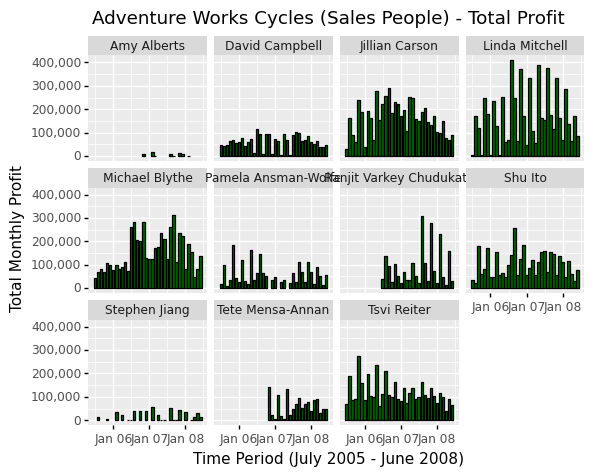

<ggplot: (8794533811691)>

In [13]:
SalesByPerson = awpo.groupby(['OrderDate', 'Sales_Person'])\
    .agg(TotalProfit = ('QuantityProfit', 'sum'))\
    .reset_index()

(
ggplot(SalesByPerson) +
  geom_bar(aes(x = "OrderDate", y = "TotalProfit"),
                 fill = "darkgreen", color = 'black', stat = "identity") +
  labs(
        title ='Adventure Works Cycles (Sales People) - Total Profit',
        x = 'Time Period (July 2005 - June 2008)',
        y = 'Total Monthly Profit',
    ) +
  scale_y_continuous(
        labels = labels(0, 500000, 100000),
        breaks = breaks(0, 500000, 100000)
    ) +
  scale_x_date(date_labels = "%b %y", date_breaks = "1 year") +
  facet_wrap('~ Sales_Person', nrow = 3)
)

We don't see any huge drop that will indicate that the low profit case is caused by the staff missing enough employees, so let's see if this is caused by discount.

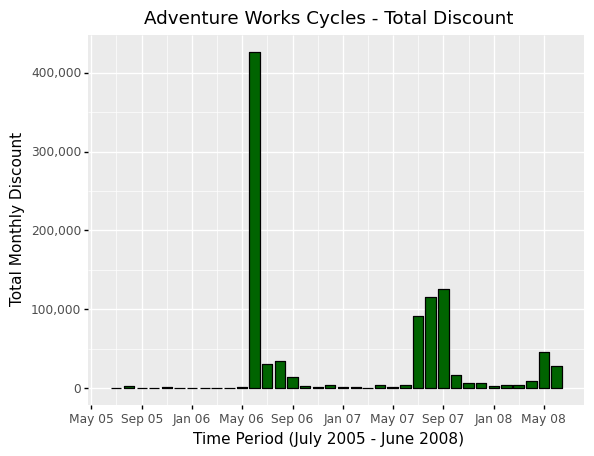

<ggplot: (8794536242923)>

In [14]:
# For that reason we are creating new variable:
# * QuantityDiscountAbsolute: float64
awpo['QuantityDiscountAbsolute'] = awpo.UnitPrice * awpo.UnitPriceDiscount * awpo.OrderQty

TotalOrderDiscount = awpo.groupby('OrderDate')\
    .agg(TotalDiscount = ('QuantityDiscountAbsolute', 'sum'))\
    .reset_index()

(
ggplot(TotalOrderDiscount) +
  geom_bar(aes(x = "OrderDate", y = "TotalDiscount"),
                 fill = "darkgreen", color = 'black', stat = "identity") +
  labs(
        title ='Adventure Works Cycles - Total Discount',
        x = 'Time Period (July 2005 - June 2008)',
        y = 'Total Monthly Discount',
    ) +
  scale_y_continuous(
        labels = labels(0, 500000, 100000),
        breaks = breaks(0, 500000, 100000)
    ) + 
  scale_x_date(date_labels = "%b %y")
)

We see the amount of money we potentially lost, but the cause of profit reduction in last few months is not due to discount definitely. Now we can see investigate the trend of all expenses and profit per each month.

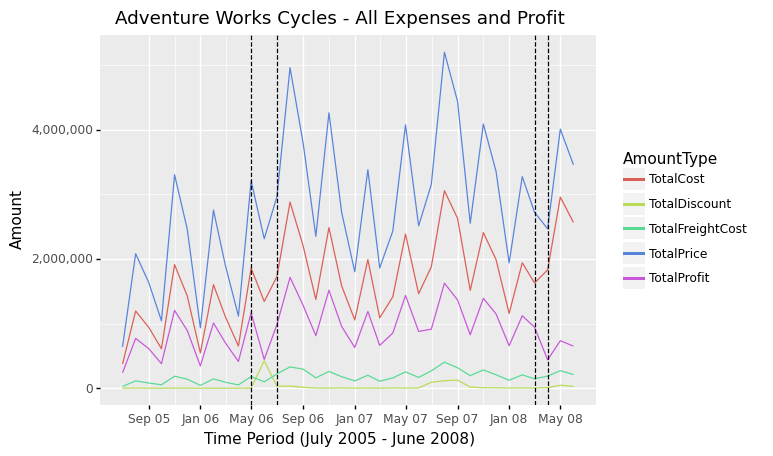

<ggplot: (8794536284579)>

In [15]:
# For that purpose we are creating new variables:
# * QuantityCost: float64
# * QuantityPrice: float64
# * QuantityFreightCost: float64
awpo['QuantityCost'] = awpo.Unit_Cost * awpo.OrderQty
awpo['QuantityPrice'] = awpo.UnitPrice * awpo.OrderQty
awpo['QuantityFreightCost'] = awpo.Unit_Freight_Cost * awpo.OrderQty
TotalPriceType = awpo.groupby('OrderDate')\
    .agg(TotalCost = ('QuantityCost', 'sum'),
         TotalPrice = ('QuantityPrice', 'sum'),
         TotalDiscount = ('QuantityDiscountAbsolute', 'sum'),
         TotalFreightCost = ('QuantityFreightCost', 'sum'),
         TotalProfit = ('QuantityProfit', 'sum'))

stacked_df = TotalPriceType.stack().reset_index()
stacked_df = stacked_df.rename(columns={'level_1': 'AmountType',
                                        0 : 'Amount'})

(
 ggplot(stacked_df) +
 geom_line(aes(x = "OrderDate", y = "Amount", color = "AmountType")) +
  labs(
        title ='Adventure Works Cycles - All Expenses and Profit',
        x = 'Time Period (July 2005 - June 2008)'
    ) +
  scale_y_continuous(
        labels = labels(0, 6000000, 2000000),
        breaks = breaks(0, 6000000, 2000000)
    ) +
  scale_x_date(date_labels = "%b %y") +
  geom_vline(xintercept = "2006-05-01", linetype="dashed") +
  geom_vline(xintercept = "2006-07-01", linetype="dashed") +
  geom_vline(xintercept = "2008-03-01", linetype="dashed") +
  geom_vline(xintercept = "2008-04-01", linetype="dashed")
 )

We see what the problem is! The increase in costs affected the decline in profits!!! We also see that the decline in profit was impacted by discount in June 2006, but right now we are intersted in exploring what happened in last few months. We are creating CostDecrease data frame that will help us detect cases, but we also have to check if all the prices remained unchanged and any of the unit costs have not decreased during the time. 

In [16]:
FirstLastCostPrice = awpo.groupby(['Product_Category', 'Product_Name'])\
    .agg(FirstCost= ('Unit_Cost', lambda x: list(x)[0]),
         LastCost = ('Unit_Cost', lambda x: list(x)[-1]),
         FirstPrice= ('UnitPrice', lambda x: list(x)[0]),
         LastPrice = ('UnitPrice', lambda x: list(x)[-1]))\
        .reset_index()

CostDecrease = FirstLastCostPrice[FirstLastCostPrice.FirstCost < FirstLastCostPrice.LastCost]

# if all the prices remained unchanged and any of the unit costs have not decreased during the time. 
FirstLastCostPrice[(FirstLastCostPrice.FirstCost > FirstLastCostPrice.LastCost)
                                | (FirstLastCostPrice.FirstPrice > FirstLastCostPrice.LastPrice)
                                | (FirstLastCostPrice.FirstPrice < FirstLastCostPrice.LastPrice)]

,Product_Category,Product_Name,FirstCost,LastCost,FirstPrice,LastPrice


Yes, we see no rows, which means we only have cost increasing moment. In order to see what kind of business model is established let's assume we sell only one unit of each product with these cases. We want to see the trend by calculating total unit cost and total unit profit of all these products that were sold during the certain months. 

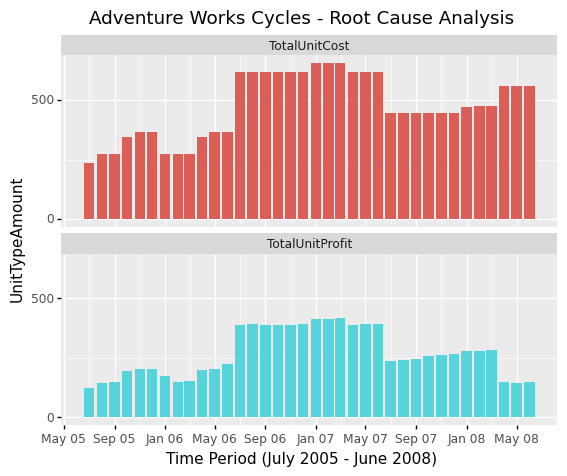

<ggplot: (8794533815863)>

In [17]:
awpo_short = awpo.merge(CostDecrease, how='inner',
                  left_on=['Product_Category', 'Product_Name'], 
                  right_on=['Product_Category', 'Product_Name'])

PriceCostTrend = awpo_short.groupby(['OrderDate', 'Product_Name'])\
    .agg(TotalUnitCost = ('Unit_Cost', 'mean'),
         TotalUnitProfit = ('UnitProfit', 'mean'))

stacked_df2 = PriceCostTrend.stack().reset_index()
stacked_df2 = stacked_df2.rename(columns={'level_2': 'UnitType',
                                          0 : 'UnitTypeAmount'})

(
 ggplot(stacked_df2) +
  stat_summary(aes(x = "OrderDate", y="UnitTypeAmount", fill = "UnitType"), geom = "bar") +
  labs(
        title ='Adventure Works Cycles - Root Cause Analysis',
        x = 'Time Period (July 2005 - June 2008)'
    ) +
  theme(legend_position='none') +
  scale_y_continuous(
        labels = labels(0, 3000, 500),
        breaks = breaks(0, 3000, 500)
    ) +
  scale_x_date(date_labels = "%b %y") +
  facet_wrap('~ UnitType', nrow = 2)
 )

Finally, this research shows what we suspected. In last few month the increase in costs affected the decline in profits. Let's just check what amount of profit we potentially lost by not setting new prices.

In [18]:
# For that purpose we are creating following variables:
# * UnitCostIncrease: float64
# * QuantityCostIncrease: float64
HigherCost = awpo_short.loc[awpo_short.Unit_Cost > awpo_short.FirstCost].copy()
HigherCost['UnitCostIncrease'] = HigherCost.Unit_Cost - HigherCost.FirstCost
HigherCost['QuantityCostIncrease'] = HigherCost.UnitCostIncrease * HigherCost.OrderQty

HigherCost.groupby('OrderDate')\
    .agg(TotalCostIncrease = ('QuantityCostIncrease', 'sum'))

,TotalCostIncrease
OrderDate,
2008-04-01,366006.618025
2008-05-01,591074.145875
2008-06-01,513034.713375


At the end we just should provide our management the list of when the unit cost of specific products increased. 

In [20]:
ChangedAt = HigherCost.groupby(['Product_Category', 'Product_Name'])\
    .agg(CostIncreasedAt = ('OrderDate', 'min'))

FinalReport = CostDecrease.merge(
    ChangedAt, how='inner',
    left_on=['Product_Category', 'Product_Name'], 
    right_on=['Product_Category', 'Product_Name']
    )

FinalReport.sort_values(by='LastCost', ascending=False).reset_index(drop=True)


,Product_Category,Product_Name,FirstCost,LastCost,FirstPrice,LastPrice,CostIncreasedAt
0,Bikes,"Road-250 Black, 44",1554.9479,1943.684875,2443.35,2443.35,2008-04-01
1,Bikes,"Road-250 Black, 48",1554.9479,1943.684875,2443.35,2443.35,2008-04-01
2,Bikes,"Road-250 Black, 52",1554.9479,1943.684875,2443.35,2443.35,2008-04-01
3,Bikes,"Road-250 Black, 58",1554.9479,1943.684875,2443.35,2443.35,2008-04-01
4,Bikes,"Road-250 Red, 58",1554.9479,1943.684875,2443.35,2443.35,2008-04-01
...,...,...,...,...,...,...,...
143,Clothing,"Racing Socks, L",3.3623,4.202875,8.99,8.99,2008-04-01
144,Clothing,"Racing Socks, M",3.3623,4.202875,8.99,8.99,2008-04-01
145,Accessories,Bike Wash - Dissolver,2.9733,3.716625,7.95,7.95,2008-04-01
146,Accessories,Water Bottle - 30 oz.,1.8663,2.332875,4.99,4.99,2008-04-01
